Decision Tree Classifier


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

In [23]:
# Load the dataset
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
# Select features (X) and target (y)
X = df.drop(columns=["PRICE"]) 
y = df["PRICE"] 

In [32]:
#splitting the data set into training aand testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [33]:
# Use DecisionTreeRegressor for continuous targets
model = DecisionTreeRegressor(max_depth=3, random_state=22)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=22)

In [34]:
y_pred =model.predict(X_test)
y_pred

array([26.75862069, 26.75862069, 20.89444444, 20.89444444, 20.89444444,
       18.12222222, 20.89444444, 20.89444444, 20.89444444, 26.75862069,
       20.89444444, 26.75862069, 16.75      , 18.12222222, 47.35882353,
       20.89444444, 11.98      , 20.89444444, 26.75862069, 26.75862069,
       11.98      , 20.89444444, 20.89444444, 16.75      , 47.35882353,
       26.75862069, 26.75862069, 26.75862069, 11.98      , 20.89444444,
       18.12222222, 16.75      , 47.35882353, 11.98      , 16.75      ,
       16.75      , 11.98      , 18.12222222, 47.35882353, 26.75862069,
       26.75862069, 11.98      , 40.125     , 11.98      , 20.89444444,
       20.89444444, 20.89444444, 20.89444444, 16.75      , 20.89444444,
       16.75      , 26.75862069, 26.75862069, 11.98      , 11.98      ,
       26.75862069, 26.75862069, 26.75862069, 16.75      , 26.75862069,
       20.89444444, 26.75862069, 26.75862069, 47.35882353, 26.75862069,
       11.98      , 11.98      , 11.98      , 47.35882353, 20.89

In [35]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 25.20
R² Score: 0.72


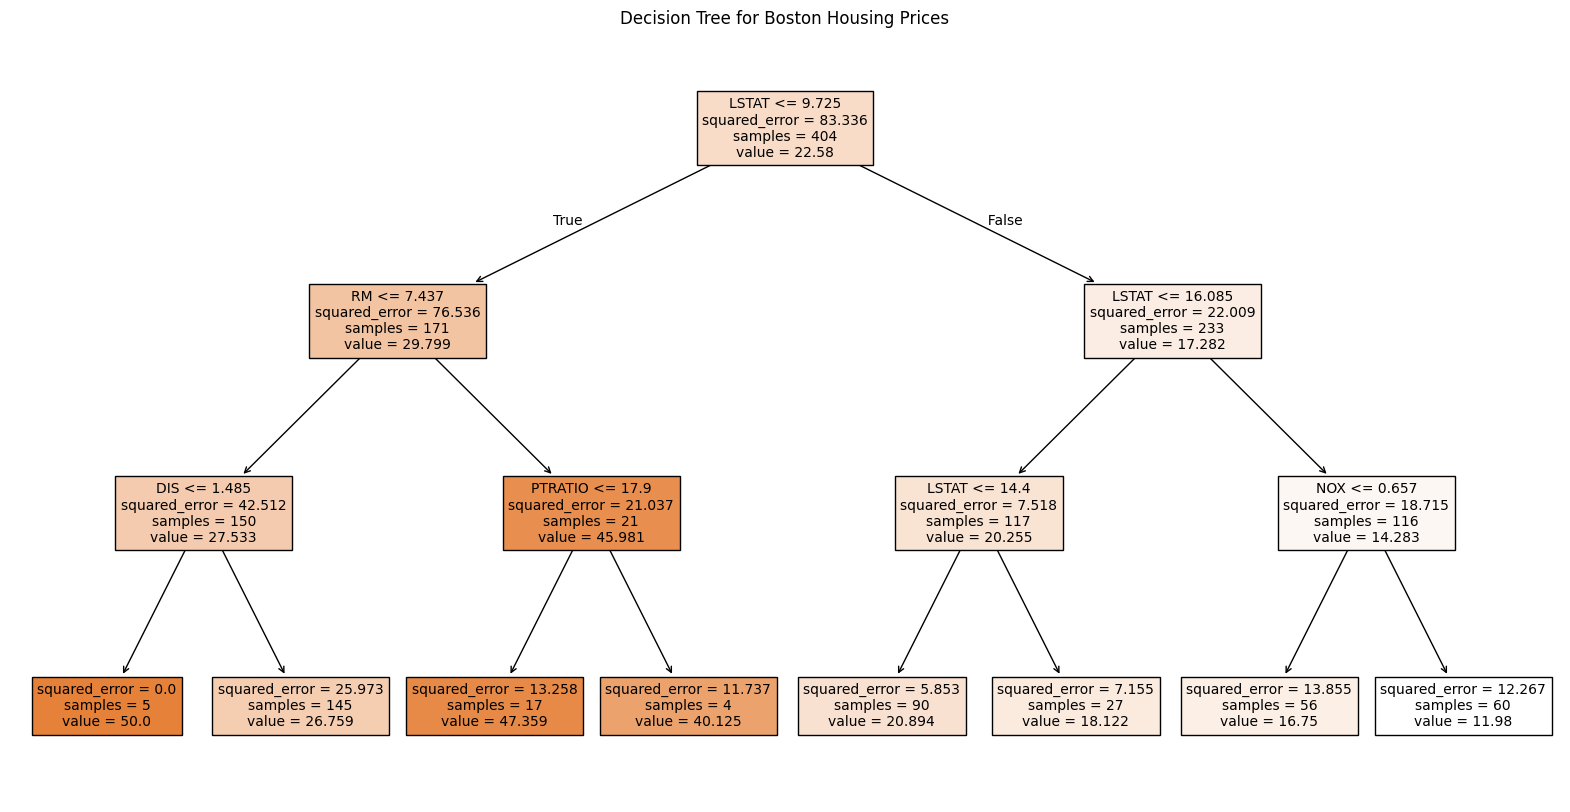

In [36]:
# Visualize the Decision Tree structure
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree for Boston Housing Prices")
plt.show()

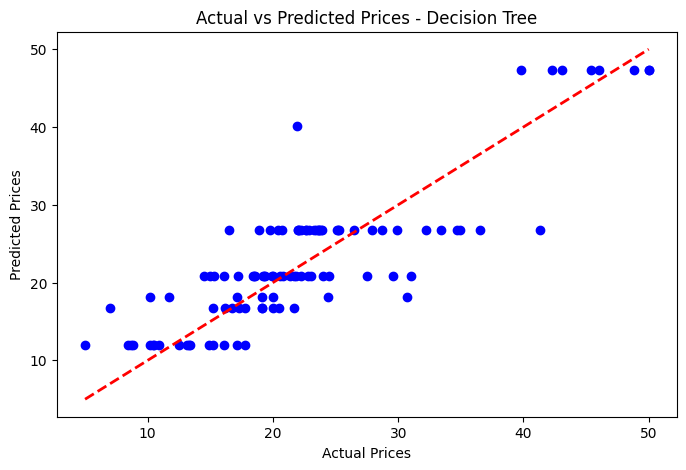

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Decision Tree")
plt.show()